d:\Programs\Anaconda\envs\gnnbook\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


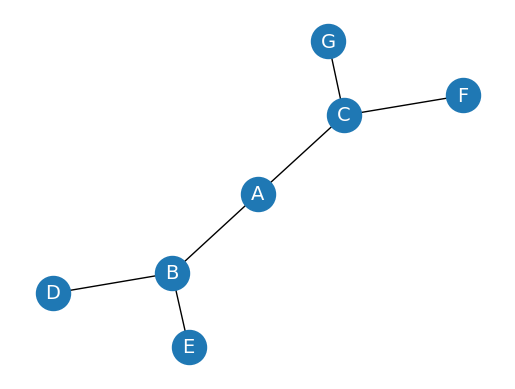

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

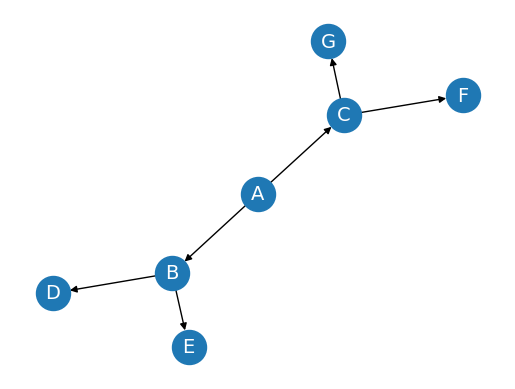

In [2]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
nx.draw_networkx(DG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

{('A', 'B'): Text(-0.17063150397490368, -0.25785521234238246, '10'),
 ('A', 'C'): Text(0.16908485308194388, 0.2584267536065791, '20'),
 ('B', 'D'): Text(-0.5751319512575159, -0.5819114840781281, '30'),
 ('B', 'E'): Text(-0.3070875406419613, -0.7577069745265291, '40'),
 ('C', 'F'): Text(0.5743060275721562, 0.5815239318372771, '50'),
 ('C', 'G'): Text(0.3081446719975651, 0.7583070963940803, '60')}

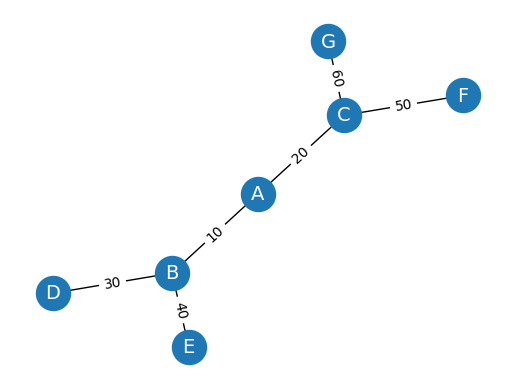

In [3]:
WG = nx.Graph()
WG.add_edges_from([('A', 'B', {"weight": 10}), ('A', 'C', {"weight": 20}), ('B', 'D', {"weight": 30}), ('B', 'E', {"weight": 40}), ('C', 'F', {"weight": 50}), ('C', 'G', {"weight": 60})])
labels = nx.get_edge_attributes(WG, "weight")

plt.axis('off')
nx.draw_networkx(WG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
nx.draw_networkx_edge_labels(WG, pos=nx.spring_layout(G, seed=0), edge_labels=labels)

In [4]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph 1 connected? {nx.is_connected(G1)}")

G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph 2 connected? {nx.is_connected(G2)}")

Is graph 1 connected? False
Is graph 2 connected? True


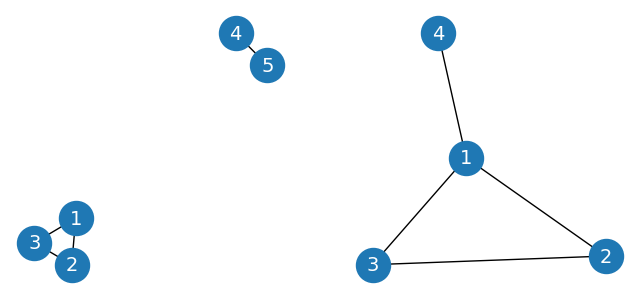

In [5]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.axis('off')
nx.draw_networkx(G1,
                 pos=nx.spring_layout(G1, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
plt.subplot(222)
plt.axis('off')
nx.draw_networkx(G2,
                 pos=nx.spring_layout(G2, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [6]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
print(f"deg(A) = {G.degree['A']}")

DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")

deg(A) = 2
deg^-(A) = 0
deg^+(A) = 2


In [7]:
print(f"Degree centrality      = {nx.degree_centrality(G)}")
print(f"Closeness centrality   = {nx.closeness_centrality(G)}")
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}")

Degree centrality      = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality   = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


In [8]:
adj = [[0,1,1,0,0,0,0],
       [1,0,0,1,1,0,0],
       [1,0,0,0,0,1,1],
       [0,1,0,0,0,0,0],
       [0,1,0,0,0,0,0],
       [0,0,1,0,0,0,0],
       [0,0,1,0,0,0,0]]

edge_list = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)]

adj_list = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1],
    5: [2],
    6: [2]
}

In [9]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

def bfs(graph, node):
    visited, queue = [node], [node]

    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)

    return visited

bfs(G, 'A')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [10]:
visited = []

def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            visited = dfs(visited, graph, neighbor)

    return visited

dfs(visited, G, 'A')

['A', 'B', 'D', 'E', 'C', 'F', 'G']